In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

In [50]:
car=pd.read_csv("car.csv", names=['buying','maint','doors','persons','lug_boot','safety','class'], header=0)
car['class'],class_names = pd.factorize(car['class'])

In [32]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [54]:
car['buying'],_=pd.factorize(car['buying'])
car['maint'],_=pd.factorize(car['maint'])
car['doors'],_=pd.factorize(car['doors'])
car['persons'],_=pd.factorize(car['persons'])
car['lug_boot'],_=pd.factorize(car['lug_boot'])
car['safety'],_=pd.factorize(car['safety'])
car['class'],_=pd.factorize(car['class'])

In [55]:
x=car.iloc[:,:-1].values
y=car.iloc[:,-1:].values.reshape(-1,1)
x,y

(array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 2],
        ...,
        [3, 3, 3, 2, 2, 0],
        [3, 3, 3, 2, 2, 1],
        [3, 3, 3, 2, 2, 2]], dtype=int64), array([[0],
        [0],
        [0],
        ...,
        [0],
        [3],
        [2]], dtype=int64))

In [63]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3, random_state=0)

In [64]:
type(xtrain), type(ytrain)

(numpy.ndarray, numpy.ndarray)

In [65]:
dstClf=tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
dstClf.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [66]:
rResult=dstClf.predict(xtest)
metrics.accuracy_score(ytest,rResult)

0.815028901734104

In [67]:
import os
os.environ["PATH"]+=os.pathsep+ 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
export_graphviz(dstClf, out_file=dot_data, filled=True, rounded=True, feature_names=sel_names, class_names=['0','1'])
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

In [72]:
dot_data=tree.export_graphviz(dstClf, out_file=None, filled=True, rounded=True, feature_names=list(car.columns.values[:-1]))

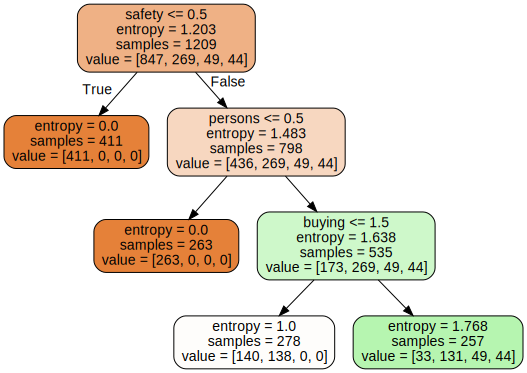

In [73]:
#export_graphviz(dstClf, out_file=dot_data, filled=True, rounded=True, feature_names=sel_names, class_names=['0','1'])
#graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph=graphviz.Source(dot_data)
graph